# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 1: NumPy ##

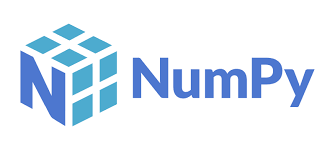

# Review

Before we start, let's have a quick recap of the lecture.

## NumPy
NumPy is a popular open-source Python package for scientific computing and is often used in machine learning research. But knowing why it is so, we need to define vectorization.

## Vectorization
In NumPy, vectorization <font color='red'>means not using explicit `for` loop or `while` loop and indexing</font>. (It doesn't mean we don't index, we just don't often index inside a `for` loop or `while` loop to access the elements). In this way, the code would look nicer and easier to understand. According to [NumPy](https://numpy.org/doc/stable/user/whatisnumpy.html), it is also "more concise and closely resembles standard mathematical notation". Here's an example to demonstrate the idea.

Suppose we perform sum of products using a for-loop:

```python
acc = 0                 # Set accumulator to 0
for a, b in zip(x, y):  # Suppose we have two containers x and y and we do parallel iteration
    acc += a * b        # Compute sum of products
```
The same idea can actually be implemented by doing vectorization using NumPy as follows:
</p>

```python
acc = (x * y).sum()     # Compute sum of products using NumPy
```
<p align="justify">
Note that the latter version is shorter, easy to read and understand, and much cleaner.

Another benefit of vectorization is that it allows optimizations. NumPy can perform the operations much faster because NumPy contains pre-compiled binaries, which significantly speed up the calculations. You can run the following code to compare.

In [ ]:
import time

"""
    Calculate sum of products using generic Python List and for loop
"""
x = list(range(1000000))  # Create a list of integers, 0, 1, 2, ..., 999999
y = list(range(1000000))  # Create another list integers, 0, 1, 2, ..., 999999
acc = 0                   # Define accumulator and set it to 0
start_time = time.time()  # Start the timer and keep the time
for a, b in zip(x, y):
    acc += a * b          # Accumulate x * y to count
print(acc)                # Print the count
end_time = time.time()    # Stop the timer and keep the time
print(f'The operation took {end_time - start_time} seconds') # Print the time duration

333332833333500000
The operation took 0.2087082862854004 seconds


In [ ]:
import numpy as np

"""
    Calculate sum of products using NumPy array and functions
"""
x = np.arange(1000000)    # Create a NumPy array of integers, 0, 1, 2, ..., 999999
y = np.arange(1000000)    # Create another NumPy array of integers, 0, 1, 2, ..., 999999
start_time = time.time()  # Start the timer and keep the time
acc = (x * y).sum()       # Element-wise multiplication of array x and y, then sum all the elements on the resultant array
print(acc)                # Print the count
end_time = time.time()    # Stop the timer and keep the time
print(f'The operation took {end_time - start_time} seconds') # Print the time duration

333332833333500000
The operation took 0.00555419921875 seconds


The above example shows that the code written in NumPy runs significantly faster than the one written using the Python list while obtaining the same result. A golden rule to bear in mind is <font color="red">avoiding using loops</font> but trying to write in NumPy or using machine learning libraries. However, there are cases that we might need to use for/while loop, but it is very rare.

NumPy also provides many useful functions for getting statistics, such as  [mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html), [median](https://numpy.org/doc/stable/reference/generated/numpy.median.html), [standard deviation](https://numpy.org/doc/stable/reference/generated/numpy.std.html), etc. Also, many other functions like generating [random numbers](https://numpy.org/doc/stable/reference/random/index.html) are very important and useful for scientific research, especially for machine learning.

# Array

All NumPy array is under the class `numpy.ndarray`. Compared to List in Python, there isn't much difference between the two except <font color="red">the length of `numpy.ndarray` is fixed when the it is created</font>.

`numpy.array` and `List` can store anything we assign to it. However, one important thing is that most of the <font color="red">operations in NumPy require the array to have numerical types</font>. Another problem with such versatility is that some operations might require a specific data type. If we don't take extra precautions to the data types of the array, it could cause catastrophic results. (Imagine you have run your program for two days only to find that the data type is wrong and the result is garbage.)


In [ ]:
class EmptyClass:
    pass # The pass statement is used as a placeholder for future code


print(f'The type of numpy array is {type(x := np.array([1,2,3, EmptyClass()]))}')  # := assign variable within expressions. Only available from Python 3.8 onwards.
print(f'The data type of the array is {x.dtype}')
x + 1  # This line causes an error!

SyntaxError: ignored

## Creating a NumPy array

NumPy provides many functions to create arrays. Here are some examples:


In [ ]:
# A function to print the array content and its shape
def print_array(arr):
    print(f'Content of the array\n{arr}\nShape of the array {arr.shape}')


a = np.array([[1, 2, 3], [2, 3, 4]])  # Create array from other iterables (e.g. List)
b = np.ones_like(a)     # Create array with same shape and same type as a
c = np.zeros(a.shape)   # Create array with shape of other array
d = np.ones((3, 3, 3))  # Create array with provided shape (3, 3, 3)
e = np.arange(10)       # Create array with 10 consective numbers starting from 0
print_array(a)
print_array(b)
print_array(c)
print_array(d)
print_array(e)

Content of the array
[[1 2 3]
 [2 3 4]]
Shape of the array (2, 3)
Content of the array
[[1 1 1]
 [1 1 1]]
Shape of the array (2, 3)
Content of the array
[[0. 0. 0.]
 [0. 0. 0.]]
Shape of the array (2, 3)
Content of the array
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
Shape of the array (3, 3, 3)
Content of the array
[0 1 2 3 4 5 6 7 8 9]
Shape of the array (10,)


## Attributes of NumPy array

As shown above, we have accessed the attribute <font color="red">``shape``</font> of the array. It shows the <font color="red">number of elements on each axis</font>. Later in the lab, when we mentioned the first axis, the nth axis, it would be derived from this attribute. This also shows the order of the dimension when you're indexing the array, which will be discussed later.

Other attributes of the array include,

-   ndim   (Number of array dimensions)
-   dtype  (Data-type of the array's elements)
-   etc.


In [ ]:
a = np.arange(6)
print(a.shape)
print(a.ndim)
print(a.dtype)

(6,)
1
int64


You can refer to the lecture notes or look into the [official tutorial of NumPy](https://numpy.org/doc/stable/user/basics.creation.html) for functions that can be used to create new arrays.

## Indexing

NumPy supports the Pythonic way to index ndarray arrays.


In [ ]:
import numpy as np

a = np.arange(100)  # Create a NumPy array with values, 0, 1, 2, ..., 99
print('The second elements:', a[2])
print('The last elements:', a[-1])
print('Select from index 10 to 20 (exclusive):', a[10:20])
print('Select from index 0 to 10 (exclusive):', a[:10])
print('Select from index 90 to the end of the list:', a[90:])
print('Select from index 10 (count from the end of list) to the end of list:', a[-10:])
print('Select from the start of list to the end of list:\n', a[:])
print('Select from index 1 to 7 (exclusive) with increment 2:', a[1:7:2])
print('Select from index 7 to 1 (exclusive) with increment -1:', a[7:1:-1])


The second elements: 2
The last elements: 99
Select from index 10 to 20 (exclusive): [10 11 12 13 14 15 16 17 18 19]
Select from index 0 to 10 (exclusive): [0 1 2 3 4 5 6 7 8 9]
Select from index 90 to the end of the list: [90 91 92 93 94 95 96 97 98 99]
Select from index 10 (count from the end of list) to the end of list: [90 91 92 93 94 95 96 97 98 99]
Select from the start of list to the end of list:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Select from index 1 to 7 (exclusive) with increment 2: [1 3 5]
Select from index 7 to 1 (exclusive) with increment -1: [7 6 5 4 3 2]


When there is more than one dimension, we can either do `a[0][1]` like normal Python code or `a[0, 1]`. The axis here has the same order as what the `shape` attribute shows.


In [ ]:
a = np.arange(1000).reshape(10, 10, 10)
print(a[5, 2:6, 1:3])
print(a[3:5, ...].shape)  # We can use ... to select all other dimensions


[[521 522]
 [531 532]
 [541 542]
 [551 552]]
(2, 10, 10)


## Integer Array Indexing

Besides the Pythonic way of indexing (slicing) NumPy arrays, there's a more advanced way to index NumPy arrays using **integer** arrays. (Could be a list or numpy.ndarray with integer dtype)


In [ ]:
a = np.arange(6).reshape(3, 2)  # a = [ [0, 1],
                                #       [2, 3],
                                #       [4, 5] ]
print(a)
print(a[[0, 1, 2], [0, 1, 0]])  # Select from index 0, 1, 2 at the first axis and index 0, 1, 0 from the second axis

[[0 1]
 [2 3]
 [4 5]]
[0 3 4]


With the indexing methods above, we can easily copy and amend the values without writing long codes.

## Boolean Array Indexing

We can also use True and False to choose individual values. However, this is probably more useful when combining it with [logic functions](https://numpy.org/doc/stable/reference/routines.logic.html) from NumPy.


In [ ]:
a = np.arange(12).reshape(3, 4)  # [ [0 1 2 3]
                                 #   [4 5 6 7]
                                 #   [8 9 10 11] ]
selection = np.array([[True, True, True, False], 
                      [True, True, True, True],
                      [False, True, False, False]])
print(a[selection])  # Boolean Array Indexing

[0 1 2 4 5 6 7 9]


In [ ]:
# a = [ [0 1 2 3]
#       [4 5 6 7]
#       [8 9 10 11] ]
selection1 = a < 6   # Comparison, return a 2D array with True value for those entry values < 6, and False otherwise
selection2 = a > 10  # Comparison, return a 2D array with True value for those entry values > 10, and False otherwise
selection = np.logical_or(selection1, selection2)  # Logical OR, return a 2D array with True value for those entry value < 6 OR value > 10, false otherwise
selection = selection1 | selection2  # Same as the previous line
print(selection)

a[selection]

[[ True  True  True  True]
 [ True  True False False]
 [False False False  True]]


array([ 0,  1,  2,  3,  4,  5, 11])

## Data types

NumPy array has a type. NumPy usually decides the type of the array for us, but sometimes we might want to declare or convert the datatype of the array. E.g.  indexing an array.


In [ ]:
class empty:
    pass


print(np.array([1, 2]).dtype)      # All elements are of type int
print(np.array([1, 2, 3.]).dtype)  # The first two elements are of type int, and the third element is of type float, float is a more general type than int
print(np.array([1, 2, 3., "https://www.youtube.com/watch?v=dQw4w9WgXcQ", empty()]).dtype)  # <object> is the most general type in Python

int64
float64
object


In [ ]:
a = np.arange(10)                   # a = [0 1 2 3 4 5 6 7 8 9]
b = np.arange(10, dtype=np.float32) # b = [0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0]

print(a[b[:5].astype(np.int32)])    # Select from index 0 to 5 (exclusive) and convert them to int32
a[b]  # Index a using b, but b is of type float32, so error is raised

[0 1 2 3 4]


IndexError: ignored

## Array Arithmetic

NumPy supports elementwise arithmetic operations (+, -, \*, /) and basic matrix operations (e.g. dot product, transpose. It's okay if you don't know what these are at this point).


In [ ]:
a = np.arange(6).reshape(2, 3)        # a = [ [0 1 2]
                                      #       [3 4 5] ]
b = np.arange(10, 16).reshape(2, 3)   # b = [ [10 11 12]
                                      #       [13 14 15] ]
print(a + b)
print(a @ b.T)  # a @ b.T is equivalent to np.dot(a, b.T). This is called matrix multiplication where b.T is the transpose of b. 
                # (Again, not necessary for you to know what this means exactly at this point)

[[10 12 14]
 [16 18 20]]
[[ 35  44]
 [134 170]]


## NumPy Functions

NumPy provides many different functions for performing computations on arrays. One of them would be numpy.sum()


In [ ]:
a = np.arange(6).reshape(2, 3)  # a = [ [0 1 2]
                                #       [3 4 5] ]
print(a)
print(np.sum(a))      # Find the sum of all the elements
print(a.sum())        # This is equivalent to the previous line
print(a.sum(axis=0))  # Find the sum along the first axis, i.e., the vertical axis, (0+3), (1+4), (2+5)
print(a.sum(axis=1))  # Find the sum along the second axis, i.e., the horizontal axis, (0+1+2), (3+4+5)
print(a.min())        # Find the min for the whole array
print(a.min(axis=0))  # Find the min along the first axis
print(a.min(axis=1))  # Fine the min along the second axis


[[0 1 2]
 [3 4 5]]
15
15
[3 5 7]
[ 3 12]
0
[0 1 2]
[0 3]


## Broadcasting

<font color="red">Broadcasting</font> allows us to <font color="red">perform operations on arrays with different shapes</font>. This function greatly reduces the redundancy of our codes and makes them much more readable and shorter.

However, there are a few rules (and steps) for this to work. (You can also refer to notes if it's unclear)
1. Dimensions are matched from the last dimension to the first dimension (according to attribute ```shape```). If one of the arrays has less dimension, it is broadcastable as long as the array with lower dimensions can match all its shapes to the larger arrays.
2. During matching, the dimension could be matched if and only if,
   1. Both of them are equal, or
   2. One of them is equal to 1
3. The content is copied across that specific dimension when the array is broadcasted.

In [ ]:
a = np.ones((2, 4, 3, 3))
b = np.ones((4, 3, 3))

_ = a + b  # Ok! Rule 1, b can match all if its dimensions to a from right to left

c = np.ones((4, 3, 1))
_ = a + c  # Ok! Rule 2.2, dimension can be matched if they're equal or one of them is 1

d = np.ones((2, 4, 3))
_ = a + d  # Error ! Rule 1, dimension is matched from the right to left

e = np.ones((2, 2, 3, 3))
_ = a + e  # Error! Rule 2, at the second dimension, the dimension is neither matched nor neither is 1

ValueError: operands could not be broadcast together with shapes (2,4,3,3) (2,2,3,3) 

In [ ]:
import numpy as np
x = np.arange(12).reshape(3, 4)    # x = [ [0 1 2 3]
                                   #       [4 5 6 7]
                                   #       [8 9 10 11] ]
offset1 = np.array([1, 0, 0, 1])   # offset1 = [1 0 0 1]
offset2 = np.array([1, 0, 1])      # offset2 = [1 0 1]

print(x + offset1)                 # offset is copied to all the elements of x
print(x + offset2.reshape(3, 1))   # This line adds a new axis so that the shape of offset2 becomes (3, 1)
print(x + offset2.reshape(3, -1))  # Same as above. -1 in reshape means letting NumPy to decide what should be the dimension. In this case, the dimension where -1 is located has to be 1.
print(x + offset2[:, np.newaxis])  # Same as above two, but np.newaxis could behave differently than reshape() in some cases. Please read the docs if you're interested.
print(x + offset2)


[[ 1  1  2  4]
 [ 5  5  6  8]
 [ 9  9 10 12]]
[[ 1  2  3  4]
 [ 4  5  6  7]
 [ 9 10 11 12]]
[[ 1  2  3  4]
 [ 4  5  6  7]
 [ 9 10 11 12]]
[[ 1  2  3  4]
 [ 4  5  6  7]
 [ 9 10 11 12]]


ValueError: ignored

# Conclusion

NumPy provides a wide variety of functions to enable efficient scientific research and engineering calculations. It keeps the simplicity of Python while allowing users to do complex computation tasks. It is a very important and useful tool if you want to dive deeper into the field of machine learning. Even though you might use other libraries in the future, many of the functions in NumPy is transferable.


In [ ]:
### This is the end of the review.
### Referenced from COMP2211 notes and NumPy official documentations
### Created by Nai Chit FUNG and heavily edited by Desmond Tsoi for the purposes of teaching COMP2211